In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Waiting for a Spark session to start...


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.


Spark Initialization Done! ApplicationId = app-20200621110421-0000
KERNEL_ID = 48358668-ec6a-45eb-b281-d43f16feb589


Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


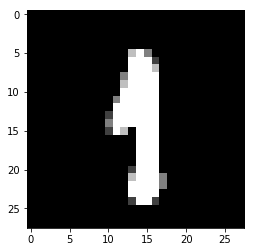

In [19]:
batch_xs, batch_ys = mnist.train.next_batch(1)
X = batch_xs
X = X.reshape([28, 28])
plt.gray()
print(batch_ys)
plt.imshow(X)

**TensorFlow placeholder** is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data. In TensorFlow terminology, we then feed data into the graph through these placeholders.  
**TensorFlow variable** is the recommended way to represent shared, persistent state your program manipulates. Variable represents a tensor whose value can be changed by running ops on it. Specific ops allow you to read and modify the values of this tensor.

In [20]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [26]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [27]:
sess = tf.InteractiveSession()

In [28]:
tf.global_variables_initializer().run()

In [29]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [30]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [31]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [32]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9194
